Syntax natürlicher Sprachen, WS 2025/26

# Vorlesung 07 - Komplexe Sätze

## Automatische Analyse

- Das Beispiel zeigt das automatische Dependency Parsing eines komplexen Satzes mit mehrfacher Einbettung mit spaCy.
- Das verwendete Modell wurde auf einem TIGER-Korpus trainiert, beachten Sie bitte die vom UD-Schema abweichenden Label und Relationen (insbesondere bei der Analyse der Kopula-Konstruktion).

In [1]:
import spacy
from spacy import displacy

In [2]:
nlp = spacy.load('de_core_news_sm')

In [3]:
doc = nlp('Als er aufwachte, sagte er, ob es regnet, sei unklar.')
displacy.render(doc, style='dep', options={'distance':100})

## Manuelle Analyse 

- Diese Analyse entspricht dem UD-Schema.

In [4]:
import nltk
from nltk import Tree
from nltk import DependencyGraph
from spacy import displacy
import spacy
from itertools import chain

In [5]:
def _tree_labeled(self, i):
    node = self.get_by_address(i)
    word, rel = node["word"], node["rel"]
    deps = sorted(chain.from_iterable(node["deps"].values()))
    return Tree(word + '(' + rel + ')', [self._tree_labeled(dep) for dep in deps]) if deps else word + '(' + rel + ')'

def tree_labeled(self):
    node = self.root
    word, rel = node["word"], node["rel"]
    deps = sorted(chain.from_iterable(node["deps"].values()))
    return Tree(word+'('+rel+')', [self._tree_labeled(dep) for dep in deps])

DependencyGraph._tree_labeled = _tree_labeled
DependencyGraph.tree_labeled = tree_labeled

def transform_nr_conll(sent_nr):
    sent_list = []
    for line in list(filter(None, sent_nr.split("\n"))):
        line_list = line.split(); line_list.pop(0); line_list.insert(1,"_")
        sent_list.append(" ".join([i for i in line_list[0:]]))
    return "\n".join([i for i in sent_list[0:]])

def displacy_dep_input(sent):
    deps = []
    for dep in sent.split('\n'):
        deps.append(dep.split())
    deps = [x for x in deps if x]
    ex, word_list, arc_list = [], [], []
    for index, dep in enumerate(deps):
        word_list.append({"text": dep[0], "tag": ""})
        line = index+1; head = int(dep[2]); label = dep[3]
        if head>line:
            start = index; end = head-1; direction = "left"
        else:
            start = head-1; end = index; direction = "right"
        if(label.lower() != "root"):
            arc_list.append({"start": start, "end": end, "label": label, "dir": direction})
    ex.append({"words": word_list,"arcs": arc_list})
    return ex

def show_dep_trees(sent_nr,style=1):
    sent = transform_nr_conll(sent_nr)
    dg = DependencyGraph(sent)
    if style == 0 or style == 2:
        tree_labeled = dg.tree_labeled()
        #tree_labeled.pretty_print(unicodelines=True)
        display(tree_labeled)
    if style == 1 or style == 2:
        ex = displacy_dep_input(sent)
        html = displacy.render(ex, style="dep", manual=True, options={'distance':100})

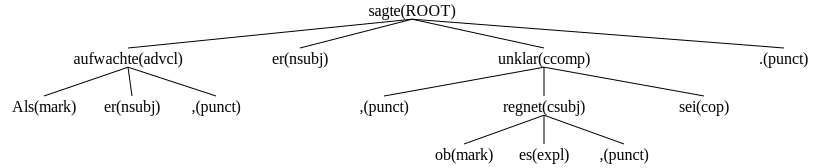

In [6]:
sent_nr = """
1 Als 3 mark
2 er 3 nsubj
3 aufwachte 5 advcl
4 , 3 punct
5 sagte 0 ROOT
6 er 5 nsubj
7 , 13 punct
8 ob 10 mark
9 es 10 expl
10 regnet 13 csubj
11 , 10 punct
12 sei 13 cop
13 unklar 5 ccomp
14 . 5 punct
"""

show_dep_trees(sent_nr, style=2)